# Creating the user profile
The plan is to do some exploratory data analysis and get a good group of products to ask the user if they like. These products should be a good sample accross the distribution of the data. 

- Get a few products from each of the most popular categories
- Get all the most popular products
- Get a few products from each bucket of the most popular price ranges
- A few completely random products

Ask the user to upvote products they like, downvote products they dont like, then store that data in a df to get aggregated into the user profile.

### Optionally/alternatively
- Ask the user to select categories, stores, and prices that they like

In [25]:
import sys
print(sys.executable)


/opt/anaconda3/envs/info376/bin/python


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
df = pd.read_csv('../data/cleaned_amazon_products.csv')
print(f"Number of unique parent ASINs: {df['parent_asin'].nunique()} and total rows: {len(df)}")
df.head()

Number of unique parent ASINs: 137269 and total rows: 137269


,parent_asin,price,product_title,categories,main_category,rating_number,average_rating,store,images
0,B000FH0MHO,51,Dash 8-300 Professional Add-On,"['Video Games', 'PC', 'Games']",Video Games,1,5.0,Aerosoft,[{'thumb': 'https://m.media-amazon.com/images/...
1,B00069EVOG,51,Phantasmagoria: A Puzzle of Flesh,"['Video Games', 'PC', 'Games']",Video Games,18,4.1,Sierra,[{'thumb': 'https://m.media-amazon.com/images/...
2,B00Z9TLVK0,58,NBA 2K17 - Early Tip Off Edition - PlayStation 4,"['Video Games', 'PlayStation 4', 'Games']",Video Games,223,4.3,2K,[{'thumb': 'https://m.media-amazon.com/images/...
3,B07SZJZV88,37,Nintendo Selects: The Legend of Zelda Ocarina ...,"['Video Games', 'Legacy Systems', 'Nintendo Sy...",Video Games,22,4.9,Amazon Renewed,[{'thumb': 'https://m.media-amazon.com/images/...
4,B002WH4ZJG,51,Thrustmaster Elite Fitness Pack for Nintendo Wii,"['Video Games', 'Legacy Systems', 'Nintendo Sy...",Video Games,3,3.0,THRUSTMASTER,[{'thumb': 'https://m.media-amazon.com/images/...


# Random sample of top categories

main_category
Video Games                  81255
Computers                    17235
All Electronics              14816
Cell Phones & Accessories     3884
Toys & Games                  2733
Name: count, dtype: int64


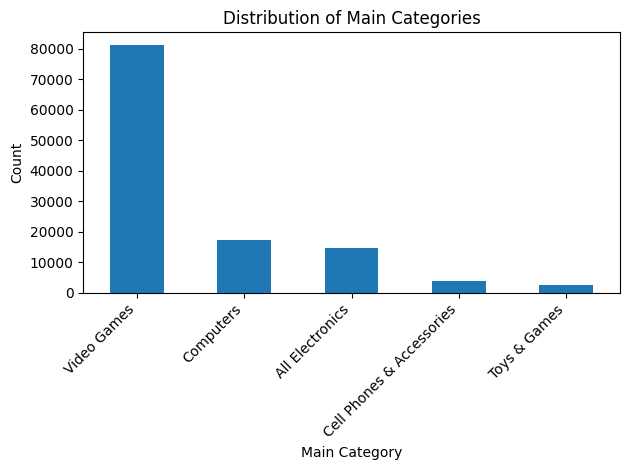

In [28]:
category_counts = df['main_category'].value_counts().head(5)
print(category_counts)
category_counts.plot(kind='bar')
plt.title("Distribution of Main Categories")
plt.xlabel("Main Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
top_categories = df['main_category'].value_counts().head(5).index.tolist()
top_categories
top_df = df[df['main_category'].isin(top_categories)]
samples_per_category = 5
category_sample = top_df.groupby('main_category').apply(
    lambda x: x.sample(n=min(len(x), samples_per_category), random_state=42)
).reset_index(drop=True)
category_sample['sample_group'] = 'categories'

/var/folders/hk/y44gb_0s6sv050t_jlhjx4xm0000gn/T/ipykernel_2229/604921342.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  category_sample = top_df.groupby('main_category').apply(


# Most rated sample

In [31]:
most_rated_products = df.nlargest(10, 'rating_number')
most_rated_products['sample_group'] = 'most_rated'

# Random sample

In [32]:
random_sample = df.sample(10, random_state=11)
random_sample['sample_group'] = 'random'

# Random sample of top price bins

/var/folders/hk/y44gb_0s6sv050t_jlhjx4xm0000gn/T/ipykernel_2229/1759089216.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_bin_sample = df.groupby('price_bin').apply(lambda x: x.sample(5, random_state=11)).reset_index(drop=True)
/var/folders/hk/y44gb_0s6sv050t_jlhjx4xm0000gn/T/ipykernel_2229/1759089216.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  price_bin_sample = df.groupby('price_bin').apply(lambda x: x.sample(5, random_state=11)).reset_index(drop=True)


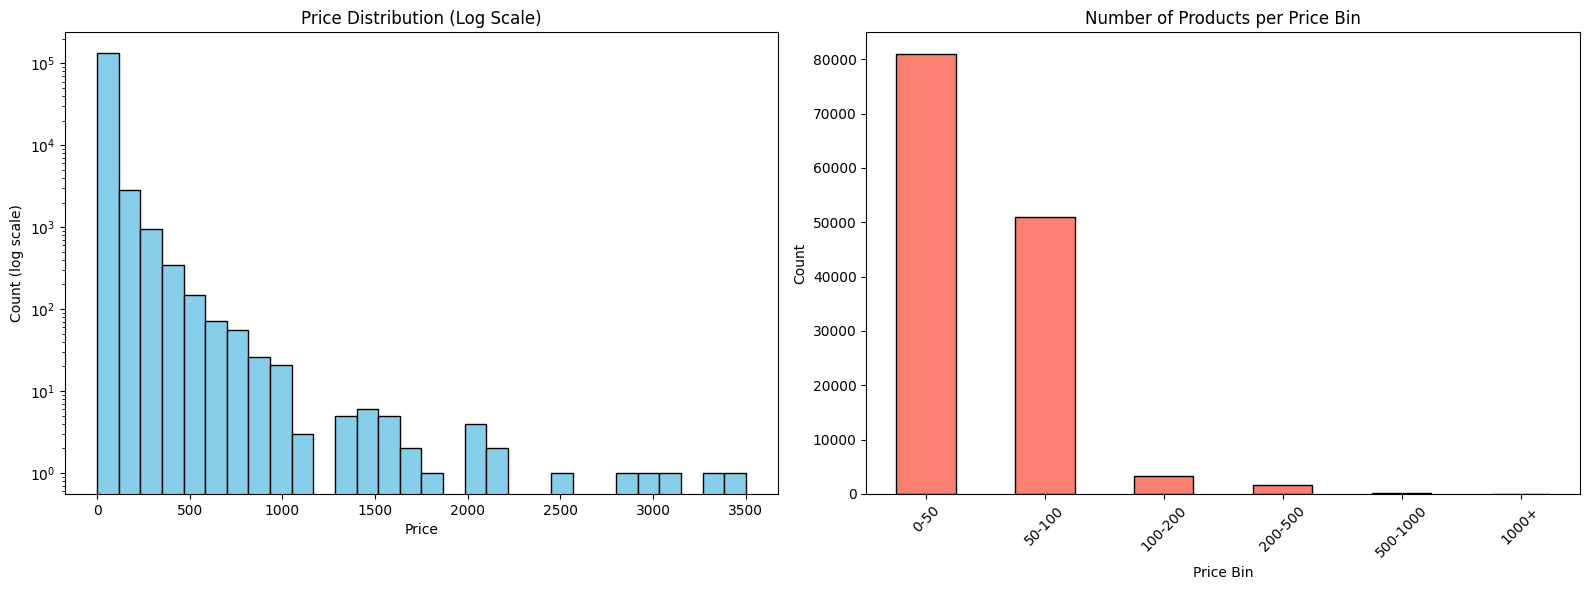

In [33]:
prices = df['price']
bins = [0, 50, 100, 200, 500, 1000, np.inf]
labels = ['0-50', '50-100', '100-200', '200-500', '500-1000', '1000+']
df['price_bin'] = pd.cut(df['price'], bins=bins, labels=labels)
price_bin_sample = df.groupby('price_bin').apply(lambda x: x.sample(5, random_state=11)).reset_index(drop=True)
price_bin_sample['sample_group'] = 'price'
bin_counts = df['price_bin'].value_counts().sort_index()
# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Left: Histogram of prices (log scale)
axes[0].hist(prices, bins=30, log=True, color='skyblue', edgecolor='black')
axes[0].set_title("Price Distribution (Log Scale)")
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Count (log scale)")

# Right: Bar plot of price bins
bin_counts.plot(kind='bar', ax=axes[1], color='salmon', edgecolor='black')
axes[1].set_title("Number of Products per Price Bin")
axes[1].set_xlabel("Price Bin")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



In [34]:
all_samples = pd.concat([category_sample, price_bin_sample, random_sample, most_rated_products]).drop_duplicates()

In [35]:
all_samples.to_csv('../data/amazon_product_samples.csv', index=False)

In [23]:
all_samples = pd.read_csv('../data/amazon_product_samples.csv')
all_samples.columns

Index(['parent_asin', 'price', 'product_title', 'categories', 'main_category',
       'rating_number', 'average_rating', 'store', 'sample_group',
       'price_bin'],
      dtype='object')

In [24]:
all_samples

,parent_asin,price,product_title,categories,main_category,rating_number,average_rating,store,sample_group,price_bin
0,B0BPWVVR1J,20,Dxldfks Battery Pack for Oculus Quest 2 Access...,"['Video Games', 'PC', 'Virtual Reality', 'Head...",All Electronics,40,4.6,Dxldfks,categories,NaN
1,B07MGFSG62,31,CHENGDAO Mobile Smartphone Gaming Controller W...,"['Video Games', 'PC', 'Accessories', 'Controll...",All Electronics,283,3.1,CHENGDAO,categories,NaN
2,B078KC76Z1,31,GameSir F1 Joystick Grip Phone Game Controller...,"['Video Games', 'PC', 'Accessories', 'Controll...",All Electronics,117,3.7,GameSir,categories,NaN
3,B09G6G2DJ1,50,Tilted Nation RGB Gaming Headset Stand - 3 in ...,"['Video Games', 'PC', 'Accessories', 'Headsets']",All Electronics,4110,4.7,Tilted Nation,categories,NaN
4,B0BL6P47RX,12,Scettar C44 programmable Wired Gaming Mouse wi...,"['Video Games', 'PC', 'Accessories', 'Gaming M...",All Electronics,4,2.2,Scettar,categories,NaN
...,...,...,...,...,...,...,...,...,...,...
70,B077GG9D5D,57,DualShock 4 Wireless Controller for PlayStatio...,"['Video Games', 'PlayStation 4', 'Accessories'...",Video Games,124073,4.7,PlayStation,most_rated,NaN
71,B01N3ASPNV,9,amFilm Tempered Glass Screen Protector for Nin...,"['Video Games', 'Nintendo Switch', 'Accessorie...",All Electronics,110368,4.8,amFilm,most_rated,NaN
72,B07KCS4WNQ,15,Dr. Seuss' The Grinch / Le Grincheux,"['Video Games', 'PlayStation 4', 'Games']",Movies & TV,106015,4.8,"Benedict Cumberbatch (Actor), Cameron See...",most_rated,NaN
73,B07ZJ6RY1W,45,$45 Nintendo eShop Gift Card [Digital Code],"['Video Games', 'Online Game Services', 'Ninte...",Video Games,103760,4.7,Nintendo,most_rated,NaN
